# Prerequisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
df1 = pd.read_csv('GSPC.csv')
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')
df2 = pd.read_csv('XOM.csv')
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')

In [3]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/2016,1937.089966,2072.209961,1937.089966,2059.739990,2059.739990,92639420000
1,01/04/2016,2056.620117,2111.050049,2033.800049,2065.300049,2065.300049,81124990000
2,01/05/2016,2067.169922,2103.479980,2025.910034,2096.949951,2096.949951,78883600000
3,01/06/2016,2093.939941,2120.550049,1991.680054,2098.860107,2098.860107,86852700000
4,01/07/2016,2099.340088,2177.090088,2074.020020,2173.600098,2173.600098,69530250000


In [4]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/2016,80.559998,85.099998,80.309998,83.589996,65.485214,292841700
1,01/04/2016,82.400002,89.779999,81.989998,88.400002,69.253410,221801200
2,01/05/2016,88.239998,90.459999,87.230003,89.019997,69.739105,219170200
3,01/06/2016,88.430000,93.830002,87.610001,93.739998,74.053986,252091800
4,01/07/2016,93.360001,95.550003,86.120003,88.949997,70.269928,209716200


In [5]:
df_volume = pd.DataFrame(pd.merge(df1, df2, on = 'Date')[['Date', 'Volume_x', 'Volume_y']])

# NaN values removal

In [6]:
df_volume.dropna(inplace = True)

In [7]:
df_volume.columns = ['Date', 'Market Volume', 'Stock Volume']
df_volume.head()

,Date,Market Volume,Stock Volume
0,01/03/2016,92639420000,292841700
1,01/04/2016,81124990000,221801200
2,01/05/2016,78883600000,219170200
3,01/06/2016,86852700000,252091800
4,01/07/2016,69530250000,209716200


# Outlier Removal

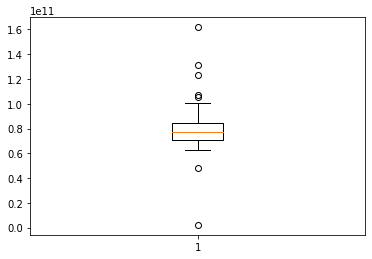

In [8]:
plt.boxplot(df_volume['Market Volume'])
plt.show()

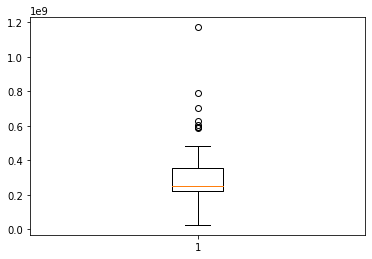

In [9]:
plt.boxplot(df_volume['Stock Volume'])
plt.show()

In [10]:
Q1 = df_volume['Market Volume'].quantile(0.25)
Q3 = df_volume['Market Volume'].quantile(0.75)
IQR = Q3 - Q1 
filter = (df_volume['Market Volume'] >= Q1 - 1.5 * IQR) & (df_volume['Market Volume'] <= Q3 + 1.5 *IQR)
df_volume = df_volume.loc[filter] 

Q1 = df_volume['Stock Volume'].quantile(0.25)
Q3 = df_volume['Stock Volume'].quantile(0.75)
IQR = Q3 - Q1 
filter = (df_volume['Stock Volume'] >= Q1 - 1.5 * IQR) & (df_volume['Stock Volume'] <= Q3 + 1.5 *IQR)
df_volume = df_volume.loc[filter] 

In [11]:
df_volume['Market Volume'] = df_volume['Market Volume'].map(int)
df_volume['Stock Volume'] = df_volume['Stock Volume'].map(int)
df_returns = pd.DataFrame(columns = ['Market Returns', 'Stock Returns'])

for i in range(0, len(df_volume)-1):
    df_returns.loc[i] = [100*(df_volume.iloc[i+1, 1] - df_volume.iloc[i, 1])/df_volume.iloc[i, 1], 100*(df_volume.iloc[i+1, 2] - df_volume.iloc[i, 2])/df_volume.iloc[i, 2]]

In [12]:
df_returns.head()

,Market Returns,Stock Returns
0,-12.429298,-24.259011
1,-2.762885,-1.186197
2,10.102353,15.021020
3,-19.944630,-16.809591
4,8.744482,12.252797


# Calculation using regression

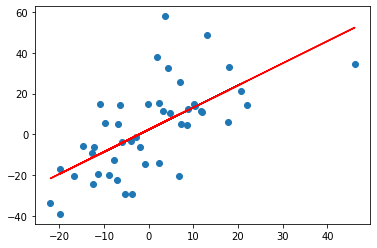

In [13]:
X = df_returns['Market Returns'].values.reshape(-1, 1)
y = df_returns['Stock Returns'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
print('Beta = ', linear_regressor.coef_[0][0], '\nIntercept = ', linear_regressor.intercept_[0])

Beta =  1.0848352432615702 
Intercept =  2.3233865336112514


# Calculation with covariance and variance (market)

In [15]:
cov = np.cov(np.array([df_returns['Market Returns'], df_returns['Stock Returns']]))
var = np.var(df_returns['Market Returns'])

print('Covariance Matrix : \n\n', cov, '\n\nVariance (Market Returns : )', var)

Covariance Matrix : 

 [[170.6852926  185.16542092]
 [185.16542092 481.86949808]] 

Variance (Market Returns : ) 166.97474276073456


In [16]:
beta = int(cov[0][1])/var
print(beta)

1.1079519988546689
